In [1]:
# Copyright (C) 2022 Intel Corporationworkbench.action.openLargeOutput
#
# SPDX-License-Identifier: MIT

import os
import datumaro as dm
import time

from datumaro.components.searcher import Searcher
from datumaro.components.visualizer import Visualizer

#### device:  cuda


In [2]:
start_time = time.time()
# dataset = dm.Dataset.import_from('./tests/assets/coco_dataset/coco', save_hash=True)
# dataset = dm.Dataset.import_from("coco_dataset", format='coco_instances', save_hash=True)
dataset = dm.Dataset.import_from("/media/hdd1/Datasets/imagenet/val", format='imagenet', save_hash=True)
print(f'setting dataset time for {len(dataset)} items: ', time.time()-start_time)

50000it [09:11, 90.58it/s] 


setting dataset time for 50000 items:  552.3549747467041


In [3]:
print("Subset candidates: ", dataset.subsets().keys())
subset = list(dataset.subsets().keys())
print("Subset: ", subset)

Subset candidates:  dict_keys(['default'])
Subset:  ['default']


In [4]:
def get_ids(dataset: dm.Dataset):
    ids = []
    for item in dataset:
            ids += [item.id]
    return ids

In [41]:
ids = get_ids(dataset)

In [42]:
for i, item in enumerate(dataset):
    if i==52:
        query = item
# print(query)

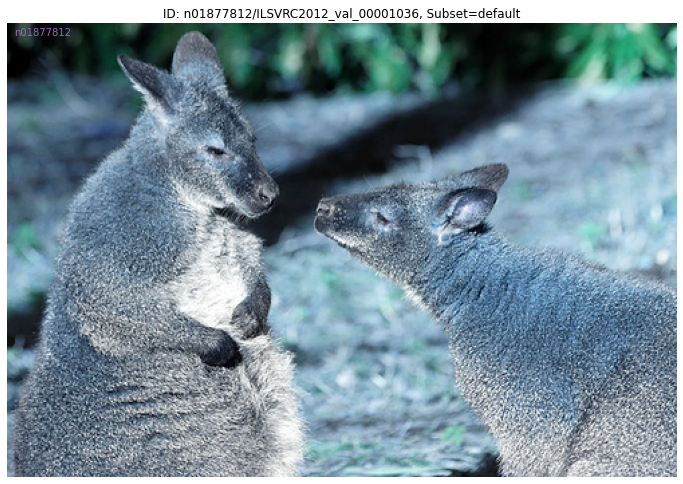

In [43]:
visualizer = Visualizer(dataset, figsize=(12, 12), alpha=0)
fig = visualizer.vis_one_sample(query.id, "default")
fig.show()

In [44]:
searcher = Searcher(dataset)

In [45]:
topk_list = searcher.search_topk(query, topk=10)
topk_list

['n03532672/ILSVRC2012_val_00047501',
 'n02361337/ILSVRC2012_val_00008936',
 'n02361337/ILSVRC2012_val_00041110',
 'n02361337/ILSVRC2012_val_00031934',
 'n02361337/ILSVRC2012_val_00009972',
 'n02361337/ILSVRC2012_val_00049706',
 'n02361337/ILSVRC2012_val_00048892',
 'n02361337/ILSVRC2012_val_00018582',
 'n02361337/ILSVRC2012_val_00007212',
 'n02361337/ILSVRC2012_val_00042013']

In [46]:
# for topk_id in topk_list:
#     print(dataset.get(id=topk_id, subset="default"))

In [47]:
visualizer = Visualizer(dataset, figsize=(12, 12), alpha=0)
results = [query.id] + topk_list

In [48]:
results

['n01877812/ILSVRC2012_val_00001036',
 'n03532672/ILSVRC2012_val_00047501',
 'n02361337/ILSVRC2012_val_00008936',
 'n02361337/ILSVRC2012_val_00041110',
 'n02361337/ILSVRC2012_val_00031934',
 'n02361337/ILSVRC2012_val_00009972',
 'n02361337/ILSVRC2012_val_00049706',
 'n02361337/ILSVRC2012_val_00048892',
 'n02361337/ILSVRC2012_val_00018582',
 'n02361337/ILSVRC2012_val_00007212',
 'n02361337/ILSVRC2012_val_00042013']

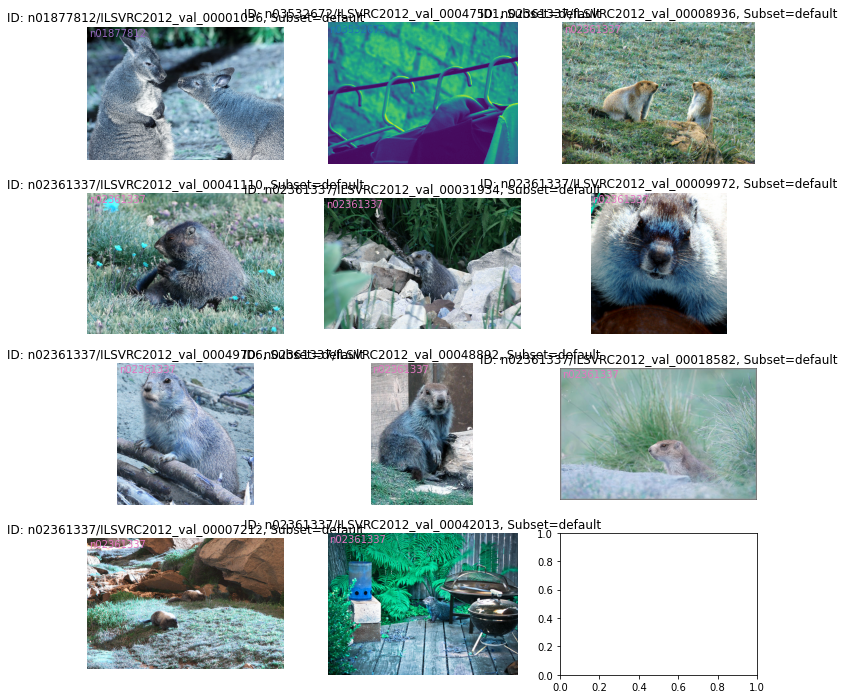

In [49]:
fig = visualizer.vis_gallery(results, "default", (None, None))
fig.show()